# <div style="text-align: center"> Introduction to Python and Machine Learning

## <div style="text-align: center">Machine Learning in Python (VI) - Neural Networks

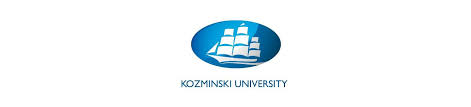
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline


# Image analysis

Neural networks are very often used for image or sound analysis. Normal sequential networks with connections all-to-all are used for:
- convolutional neural networks, **CNN**, which are used for image analysis
- recurrent neural networks, **RNN**, which are used for sound analysis

Most often the fun with convolutional networks and image analysis starts with recognizing numbers. However, we will do something a little more interesting / funny - we will play with recognizing whether there is a dog or cat in the picture.  
You will find the data you need for this here: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition  
<br><br>
On the `data` tab of this page there are two downloadable `train.zip` and `test.zip` files. Just download the `train.zip` and then extract to the folder where this notebook is located to the `cats_vs_dogs` folder, the subfolder `train`.

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

We load the names of image files:

In [4]:
import os

img_dir = r'C:\DATA\cats & dogs\train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [5]:
full_images = [os.path.join(img_dir, img) for img in images]

In [6]:
full_images[:3]

['C:\\DATA\\cats & dogs\\train\\cat.0.jpg',
 'C:\\DATA\\cats & dogs\\train\\cat.1.jpg',
 'C:\\DATA\\cats & dogs\\train\\cat.10.jpg']

We'll create a function for showing rgb layers

In [7]:
def show_rgb_layers(image, subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    
    im_shape = image.shape
    
#     check if the loaded image has 3 dimensions
    assert image.ndim == 3
#     check whether the last dimension of im_shape has 3 dimensions
    assert im_shape[-1] == 3
    
#     plot rgb layers
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig

## We're loading images
We load 10000 images, 5000 each per category (training on all would take too long).

In [8]:
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=10000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [13]:
X_train.shape

(9000, 50, 50, 3)

In [14]:
from tensorflow.keras.models import load_model

In [15]:
model = load_model((r'C:\Users\leont\Dysk Google\CLASSES\ALK 2020-2021\Introduction to Python and Machine Learning\Class 12\cats_dogs_model'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 46, 46, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [18]:
# plt.plot(history.history['acc'])
# plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
282/282 [==============================] - 1s 2ms/step - loss: 0.8928 - accuracy: 0.8122
0.8122222423553467

Accuracy on the test data:
32/32 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.8180
0.8180000185966492


The correctness of the test data is significantly higher than 50%, so the model has learned something. In the case above we also see that the correctness on the test data is not very different from the correctness on the training data.  
Therefore we will try to train the network further. To make the work easier this time we will separate 4% of the training data (i.e. 0.04 * 9000, i.e. 360 pictures) into an independent validation set - on this set of pictures we do not teach the network, but use it on an ongoing basis to monitor the correctness of the network on independent data during the training. When the correctness of this independent data stops improving - the trening will be stopped.
* To be able to stop the trening earlier, we import `EarlyStopping` and create a `stop_early` by setting the `patience` from `EarlyStopping` to `2` (i.e., the trening will be stopped if we don't get better validation data for two consecutive epochs.
* Then set the `validation_split` in the `model.fit` to the appropriate value.
* Add stop_early as a callback, set the callbacks argument in the model.fit. `callbacks` always takes the list, so if you only give one callback, make sure to put it in the list (i.e., instead of `some_callback` you give `[some_callback]`.

<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Using the information above, please finish the code below:

</div>

In [19]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.04)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5081 - accuracy: 0.7764 - val_loss: 0.4291 - val_accuracy: 0.8028
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3848 - accuracy: 0.8291 - val_loss: 0.4747 - val_accuracy: 0.7889
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8590 - val_loss: 0.4155 - val_accuracy: 0.8083
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.8830 - val_loss: 0.4377 - val_accuracy: 0.8222
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2422 - accuracy: 0.8990 - val_loss: 0.4982 - val_accuracy: 0.8222
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2032 - accuracy: 0.9171 - val_loss: 0.5457 - val_accuracy: 0.8028
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1709 - accuracy: 0.9326 - val_loss: 0.5547 - val_accuracy: 0.7889
Epoch 

Text(0.5, 0, 'Number of epochs')

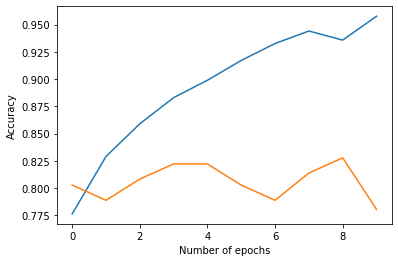

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')

The training was interrupted because the correctness on the validation data stopped growing.

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Let's see how our model works now. First, as before, we will evaluate the correctness on the test and training data:

</div>

In [24]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
282/282 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9316
0.9315555691719055

Accuracy on the test data:
32/32 [==============================] - 0s 2ms/step - loss: 0.9498 - accuracy: 0.7640
0.7639999985694885


In [29]:
model2 = load_model((r'C:\Users\leont\Dysk Google\CLASSES\ALK 2020-2021\Introduction to Python and Machine Learning\Class 12\cats_dogs_model_tf2'))

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

stop_early = EarlyStopping(patience=2)

In [32]:
history = model2.fit(X_train, y_train, epochs=10, validation_split=0.04, callbacks=[stop_early])

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.7793 - val_loss: 0.4960 - val_accuracy: 0.7583
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3871 - accuracy: 0.8292 - val_loss: 0.4562 - val_accuracy: 0.8083
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.8630 - val_loss: 0.4499 - val_accuracy: 0.8111
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2770 - accuracy: 0.8836 - val_loss: 0.5546 - val_accuracy: 0.7861
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2302 - accuracy: 0.9047 - val_loss: 0.5449 - val_accuracy: 0.7917


Text(0.5, 0, 'Number of epochs')

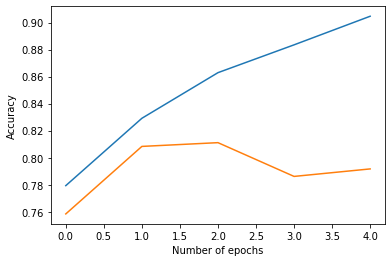

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')

In [24]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

Accuracy on the training data:
282/282 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9316
0.9315555691719055

Accuracy on the test data:
32/32 [==============================] - 0s 2ms/step - loss: 0.9498 - accuracy: 0.7640
0.7639999985694885


In [34]:
print('Accuracy on the training data:')
print(model2.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model2.evaluate(X_test, y_test)[1])

Accuracy on the training data:
282/282 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9129
0.9128888845443726

Accuracy on the test data:
32/32 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7920
0.7919999957084656


Please note that further training has improved the model on training data, but not on test data.
This is a symptom that the network has started to overfit - later on we will try to prevent this by adding a regulation to the network.  
Before we move on to this step, let's check a few examples that the network recognizes correctly, and a few that are not recognized correctly:

In [37]:
# let's take the first 25 test photos:
test_sample = X_test[:25]
predictions = model.predict(test_sample)
true_labels = y_test[:25]

In [42]:
predictions

array([[9.9998879e-01],
       [9.9980253e-01],
       [5.4699281e-05],
       [4.3478069e-01],
       [9.9990118e-01],
       [2.2983292e-02],
       [9.6859097e-01],
       [9.9893886e-01],
       [4.9571227e-09],
       [4.0804121e-06],
       [4.0916950e-01],
       [9.8995918e-01],
       [1.2925826e-01],
       [9.3275219e-01],
       [6.4638926e-04],
       [5.7307322e-04],
       [1.2483711e-08],
       [6.0744423e-01],
       [1.9238848e-07],
       [5.7297501e-07],
       [3.4529216e-06],
       [3.8381293e-01],
       [7.1399484e-08],
       [1.0431246e-02],
       [7.5075018e-01]], dtype=float32)

In [38]:
test_sample.shape

(25, 50, 50, 3)

In [44]:
true_labels[1]

1

In [43]:
correct_response

1

In [45]:
it_is_really

'dog'

In [46]:
net_claims

0.99980253

In [47]:
is_net_correct

True

In [48]:
['is wrong', 'is right'][is_net_correct]

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  """Entry point for launching an IPython kernel.


'is right'

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # This is added back by InteractiveShellApp.init_path()


(-0.5, 49.5, 49.5, -0.5)

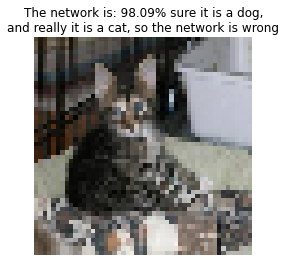

In [105]:
check_idx = 66
plt.imshow(test_sample[check_idx] / 255)


text = 'The network is: {:.2f}% sure it is a dog,\nand really it is a {}, so the network {}'
correct_response = true_labels[check_idx]
it_is_really = ['cat', 'dog'][correct_response]
net_claims = predictions[check_idx, 0]
is_net_correct = np.abs(net_claims - correct_response) < 0.5

plt.title(text.format(net_claims * 100., it_is_really, ['is wrong', 'is right'][is_net_correct]))
plt.axis('off')

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Using the code above, check the examples until you find three incorrectly classified photos. Do you have any idea why the network misclassified these photos? (An example of such speculation - dogs may be photographed more often through the fence so the presence of this kind of pattern may convince the network that we are dealing with a dog, even if the picture shows a cat; similarly, other characteristics of the environment may influence the prediction, e.g. cats are more likely to be photographed indoors so a cat photographed outdoors may be considered a dog). Remember that the web doesn't know what the pictures 'really' represent, so different features of the picture correlated with the presence of the dog, but not signalling its presence, may sometimes confuse the model rather than guide it.  
<br>    
We can see that the web is generally doing well, it has a correctness of more than 70%, although human would obviously do much better (human's correctness would probably be around 99% - some photos with a resolution of 50 x 50 can also cause a problem for us). But people learn in an interactive, three-dimensional environment, and the web learned from pixel values. :)

</div>

In [91]:
# let's take ALL test photos:
test_sample = X_test
predictions = model.predict(test_sample)
true_labels = y_test

model_predictions = model.predict_classes(test_sample)

model_predictions = model_predictions.reshape(1000)

In [96]:
model_predictions.shape

(1000,)

In [97]:
true_labels.shape

(1000,)

In [103]:
~(model_predictions == true_labels)

array([False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False,

In [104]:
np.where(~(model_predictions == true_labels))

(array([  6,  10,  13,  26,  28,  30,  31,  34,  42,  48,  56,  59,  61,
         62,  64,  66,  75,  79,  87,  90,  96, 100, 102, 107, 109, 110,
        121, 123, 126, 129, 144, 148, 152, 159, 160, 161, 162, 163, 166,
        169, 176, 178, 187, 188, 191, 193, 195, 199, 200, 205, 207, 218,
        220, 223, 242, 251, 264, 267, 268, 281, 283, 287, 289, 294, 295,
        300, 304, 305, 307, 312, 313, 314, 323, 329, 330, 333, 337, 338,
        339, 341, 345, 346, 347, 350, 356, 360, 361, 362, 363, 367, 370,
        373, 374, 377, 378, 386, 389, 394, 395, 396, 397, 398, 399, 400,
        403, 406, 413, 415, 420, 430, 455, 460, 465, 470, 471, 478, 483,
        487, 501, 502, 503, 504, 508, 512, 515, 516, 518, 519, 521, 526,
        529, 540, 547, 552, 568, 570, 571, 572, 576, 577, 582, 584, 585,
        603, 607, 610, 614, 616, 622, 627, 630, 631, 645, 652, 656, 661,
        665, 666, 689, 693, 694, 696, 698, 701, 704, 709, 710, 713, 721,
        723, 727, 731, 735, 745, 747, 748, 754, 756

## What has our network learned?

We will now visualize some first layer filters that the network has learned.

First let's display the filter weights of the first network layer. Our neural network, present in the `model` variable, has a `layers` method, where we can find all network layers:

In [106]:
model.layers

In [107]:
model.layers[0]

<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

To find the weights of the first layer filters we have to:
* select this layer from the list (usual indexing)
* use the `get_weights()` method on the result (without arguments)
* `get_weights` returns a list of two elements: filter weights, and the resting value of the filters. Therefore, we will select the first element - the filter weights.

</div>

In [108]:
first_layer = model.layers[0]
weights = first_layer.get_weights()[0]

In [113]:
first_layer.get_weights()[0].shape

(3, 3, 3, 16)

The weights should be `3 x 3 x 3 x 16` (*Height* x *Width* x *Depth (RGB)* x *Number of filters*):

In [114]:
weights.shape

(3, 3, 3, 16)

<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

We draw filters, averaging the RGB dimension (to make them easier to interpret) - you need to add one character to the code below:

</div>

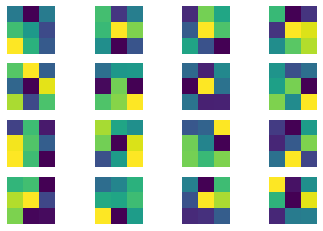

In [30]:
fig, ax = plt.subplots(nrows=4, ncols=4)
ax = ax.ravel()

for idx in range(len(ax)):
    # you have to give a dimension that we average, remember that single
    # filter has dimensions: height to width on RGB
    average_weights = weights[..., idx].mean(axis=2)
    ax[idx].imshow(average_weights)
    ax[idx].axis('off')

AxisError: axis 2 is out of bounds for array of dimension 2

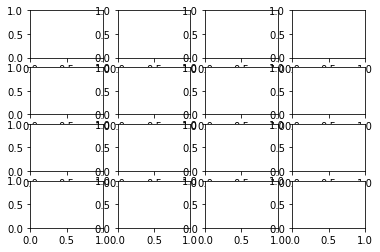

In [117]:
fig, ax = plt.subplots(nrows=4, ncols=4)
ax = ax.ravel()

for idx in range(len(ax)):
    # you have to give a dimension that we average, remember that single
    # filter has dimensions: height to width on RGB
    average_weights = weights[0fig, ax = plt.subplots(nrows=4, ncols=4)
ax = ax.ravel()

for idx in range(len(ax)):
    # you have to give a dimension that we average, remember that single
    # filter has dimensions: height to width on RGB
    average_weights = weights[..., idx].mean(axis=2)
    ax[idx].imshow(average_weights)
    ax[idx].axis('off'), idx].mean(axis=2)
    ax[idx].imshow(average_weights)
    ax[idx].axis('off')

## Network regularization
We will now try to improve network performance through regularization. We are building the whole network as before, but we add:
* `Dropout` to one of the last layers.
* `BatchNormalization` between convoluted layers (`Conv2d`)  

Dropout is a simple way of regularization - from time to time some neurons are randomly removed from a given layer. This leads to much slower learning, but prevents neurons or combinations of neurons from remembering specific training examples (and, therefore, overfitting!).  
`Dropout(0.25)` leads to the ejection of 25% of the neurons at each training stage. In our case, we want to discard 50% of the neurons during training.  
`BatchNormalization` is a method of normalizing data going from one layer to the next, which usually improves the learning of the network, in this case by giving `BatchNormalization()` to `model.add()` (normalization is something like standardization).

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Import Dropout and BatchNormalization from `keras.layers`, and then create the modified network.

</div>

In [118]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [119]:
model = Sequential([

# we create two convolution layers, then max pooling
    Conv2D(16, (3,3), input_shape=(50,50,3), activation='relu'),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D((3,3)),

# # add BatchNormalization
    BatchNormalization(),

# we create next two convolution layers, then max pooling
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

# # add BatchNormalization
    BatchNormalization(),

# finally, we flatten all the filters to one vector and then add 64 ordinary neurons
    Flatten(input_shape=(5,5,32)),
    Dense(64, activation='relu'),
    
# add Dropout
    Dropout(0.5),

# and the output neuron that says dog (1) or cat (0)
    Dense(1, activation='sigmoid')
])

# and compile, like always before
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Regularization leads to a much slower learning pace, so this time we will be training for more epochs - at least 20. We also use, as before, 4% of the data for validation and we want the training to end if there is no improvement for four epochs (this time four - because training will be much more difficult for the network with regularization).  
The training will take some time, so patience...

<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

Fill out the code below and run the cells.

</div>

In [120]:
stop_early = EarlyStopping(patience=4)
history = model.fit(X_train, y_train, epochs=20, validation_split=0.04, callbacks=[stop_early])

Epoch 1/20
270/270 [==============================] - 1s 4ms/step - loss: 0.7987 - accuracy: 0.5831 - val_loss: 0.7002 - val_accuracy: 0.5833
Epoch 2/20
270/270 [==============================] - 1s 3ms/step - loss: 0.6372 - accuracy: 0.6493 - val_loss: 0.6490 - val_accuracy: 0.6083
Epoch 3/20
270/270 [==============================] - 1s 3ms/step - loss: 0.5737 - accuracy: 0.7042 - val_loss: 0.5978 - val_accuracy: 0.6583
Epoch 4/20
270/270 [==============================] - 1s 3ms/step - loss: 0.5249 - accuracy: 0.7362 - val_loss: 0.5156 - val_accuracy: 0.7417
Epoch 5/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4785 - accuracy: 0.7738 - val_loss: 0.4935 - val_accuracy: 0.7694
Epoch 6/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4337 - accuracy: 0.7997 - val_loss: 0.4936 - val_accuracy: 0.7722
Epoch 7/20
270/270 [==============================] - 1s 3ms/step - loss: 0.4057 - accuracy: 0.8116 - val_loss: 0.4835 - val_accuracy: 0.7611
Epoch 

It can be seen that with the successive epochs the network correctness increases linearly for training data, while for validation data we observe significant variability with a tendency to improve correctness (and cost, i.e. `val_loss`). However, the network does not achieve a higher validation rate than 84% on validation data (we would have to build a bigger network for this). The training ends before the end of 20 epochs because we no longer see any improvement. We can now check the correctness on the test data. But before that - the chart of changes in correctness on training and validation data:

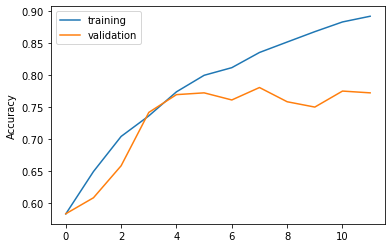

In [122]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.legend()

In [123]:
train_corr = model.evaluate(X_train, y_train)[1]
print('Accuracy on the training data:')
print(train_corr)

test_corr = model.evaluate(X_test, y_test)[1]
print('\nAccuracy on the test data:')
print(test_corr)

282/282 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.9121
Accuracy on the training data:
0.9121111035346985
32/32 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7470

Accuracy on the test data:
0.746999979019165


Using reguralization, we come to the correctness slightly above 78%, almost 80%. This is a significant improvement, but we are still far from human correctness. However, we have seen that the networks do not understand the picture as we do - a picture that is an incomprehensible noise can convince the net that it has to do with a dog.

This is still not a model that we would be satisfied with in practice, but for playing on a weak computer it is ok. To have better accuracy, we would also need more data - i.e. all 25,000 photos to be loaded. We could also increase the scaling (currently we are scaling all the photos to 50 by 50 pixels - in this size some photos will be difficult to identify.  
Also, with `25,000` photos you actually produce up to half a million photos - by rotating, scaling and cropping the photos (this can be done automatically using `keras.preprocessing.image.ImageDataGenerator`. This number of examples would lead our network to have much better accuracy.  <br><br>
Another strategy is to use a network previously trained on millions of photos (there are a lot of such public domain architectures - including some very well known architectures) and stick several hundred neurons to its top layers to classify dog vs. cat. Then the training would take place on such a hybrid network - a large part of it would be frozen, already trained before, and only the final layer (or layers) are trained using the available data. This kind of strategy is called *transfer learning*, it is the last of our struggle with image analysis. We won't take full advantage of *transfer learning* here - and we'll only see how helpful the networks already trained on millions of images are.

## Transfer learning
We will use the ResNet50 network, which together with the weights can be downloaded from the web using the Keras library:

In [81]:
from keras.applications import ResNet50

resnet_model = ResNet50()

In my case, the network weights are not downloaded because I downloaded them earlier. It may take 1-8 minutes (depending on the connection speed) to download network scales.  
The `ResNet50` network is huge, compared to the several layers of network we trained, let's see a summary:

In [82]:
resnet_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

How many parameters does the network have in total (you will find this information at the bottom of the description)? Hint: the number of parameters here is already counted in millions. Such networks are trained on many cores and many GPUs for days (and sometimes weeks) on millions of photos.
The network is trained on the basis of `ImageNet`, which has 14 million images, and the task of the network is to identify 1000 different types of objects (including people, cars, animals, food, etc.). Among the animals, the network must not only distinguish between cats and dogs, but also distinguish between several species of dogs and cats. A network trained on this basis is therefore ideal for our task.  
However, before we use it, we have to process our photos differently - the `ImageNet` database consists of photos with a different resolution (`224 x 224`). In addition, these images are processed a little differently for `ResNet`. So we have to load the data again.

<div class="alert alert-block alert-success">
⚠️TASK 8
<br>

Finish the code below:

</div>

In [83]:
X, y = load_images(img_dir, n_images=10000, resize=(__, __))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


If you have problems with RAM - you can load accordingly less photos (for example 5000).

In [85]:
data_size_MB = X.size * X.itemsize / 1000000
print('The data has now: {} MB'.format(data_size_MB))

Dane mają teraz 6021.12 MB


Let's check the network predictions for a few pictures: 1543 and 5623. Let's see these images first:

<div class="alert alert-block alert-success">
⚠️TASK 9
<br>

Please visualise dog cat and dog picture numbers 1543 and 5623. How can we access correctly the picture numbers? Check the `images` list - the images are not sorted properly!

</div>

We will now process the data to match the ResNet50 format:

In [86]:
from keras.applications.resnet50 import preprocess_input

X = preprocess_input(X)

Let's see what predictions ResNet gives for these images:

In [151]:
preds = resnet_model.predict(X)

The `preds` is now a matrix of two lines and 1000 columns. Rows are predictions for subsequent images, and columns are categories of predictions (ImageNet is a task in which the network classifies images as belonging to one of 1000 categories). Let's display each prediction as a line:

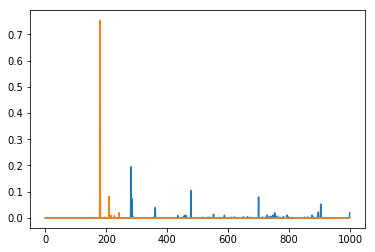

In [153]:
plt.plot(preds.T);

To understand what it means by which category we will use the `decode_predictions` function, giving it a `preds` matrix. We will also ask this function to give class names for only 5 classes with the highest certainty (for each prediction).

In [154]:
from keras.applications.resnet50 import decode_predictions

labels = decode_predictions(preds, top=5)

We now have translated the predictions in the `labels` variable. Let's see what predictions the network gave for the first image (cat):

In [155]:
labels[0]

[('n02123045', 'tabby', 0.1946047),
 ('n02971356', 'carton', 0.10414422),
 ('n03887697', 'paper_towel', 0.079770684),
 ('n02124075', 'Egyptian_cat', 0.0728737),
 ('n02123159', 'tiger_cat', 0.06724474)]

tabby is a striped cat, which means the net recognizes the cat. Only 19% is a striped cat and 10% is already bet on cardboard (then 8% on a paper towel - probably because of the bright colour and human hand). And what is the prediction for the second picture?

In [156]:
labels[1]

[('n02093428', 'American_Staffordshire_terrier', 0.7536513),
 ('n02093256', 'Staffordshire_bullterrier', 0.10232209),
 ('n02099849', 'Chesapeake_Bay_retriever', 0.081988454),
 ('n02108089', 'boxer', 0.01993745),
 ('n02101388', 'Brittany_spaniel', 0.009274933)]

75% for an American staffordshire terrier, which is the correct answer. We can see that the network is doing quite well in recognizing the animals we are interested in. How do we use it for our purposes? We have two options:
* we use the network the way it works now and collect % confidence inside the dog category and inside the cat category and see if the cat or dog has a higher percentage
* we cut off the last layer of the net (1000 neurons corresponding to the categories) and stick one (dog vs. cat), then we train the net on our pictures. However, we do not train the whole network, but only the last layer of the net  

You will be able to use the latter solution in an additional project. For now, the end!